###  FIND ALL DATA BIAS

In [1]:
# from covid_import import *
from covid import *
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20, 6

''' Data Preprocessing '''
# collect all data into list all countries of tuple (country, confirmed), (country, fatalities), (country, recovered)
countries = sdata['Country_Region'].unique()

''' Number of all infected countries changed by day '''

# filter column by name and convert Pandas frame to Numpy Array
infected_countries_earliest = np.unique(data[0][data[0]['Confirmed']>0].filter(regex=("Country.*")).values)
infected_countries_latest = np.unique(data[-1][data[-1]['Confirmed']>0].filter(regex=("Country.*")).values)

num_infected_countries = [len(np.unique(data[i][data[i]['Confirmed']>0].filter(regex=("Country.*")).values)) for i in range(len(data))]



Start importing World-data  ./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [2]:
len(y_dat_confirmed['US'])

353

In [11]:
dataconfirmed = [dict() for i in range(len(data))]
datafatal = [dict() for i in range(len(data))]
datarecovered = [dict() for i in range(len(data))]

for i in range(len(data)):
    # print("Day: ", i)
    col = data[i].filter(like='Country').columns[0]
    
    for country in infected_countries_latest:
        dataconfirmed[i][country] = y_dat_confirmed[country][i]
        datafatal[i][country] = y_dat_deaths[country][i]
        datarecovered[i][country] = y_dat_recovered[country][i]

In [12]:
dataconfirmed[100]['US']

1103885

In [13]:
datafatal[310]['US']

265195

In [14]:
pdConfirm = pd.DataFrame(data=dataconfirmed, columns=infected_countries_latest)
pdDeaths = pd.DataFrame(data=datafatal, columns=infected_countries_latest)
pdRecovered = pd.DataFrame(data=datarecovered, columns=infected_countries_latest)
pdConfirm

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0.0,0,0,0,0
1,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,2.0,0,0,0,0
2,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,2.0,0,0,0,0
3,0,0,0,0,0,0,0,0,4.0,0,...,0,0,0,0,0,2.0,0,0,0,0
4,0,0,0,0,0,0,0,0,4.0,0,...,0,0,0,0,0,2.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,53011,59623,100645,8249,17684,160,1648940,160220,28517.0,367410,...,2721622,21426,77258,1,114407,1497.0,142228,2101,21993,15829
349,53105,60283,100873,8308,17756,160,1662730,160544,28536.0,369721,...,2782709,22104,77295,1,114662,1504.0,143169,2101,22645,17194
350,53105,61008,101120,8348,17864,163,1676171,160853,28546.0,372190,...,2845265,23048,77350,1,114908,1505.0,144257,2102,23495,17804
351,53207,61705,101382,8348,17974,163,1690006,161054,28571.0,374730,...,2898052,23807,77412,1,115322,1509.0,145252,2104,24297,18675


In [18]:
pdRecovered['US']

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
         ...    
348    8299717.0
349    8377851.0
350    8475427.0
351    8588540.0
352    8662589.0
Name: US, Length: 353, dtype: float64

In [17]:
pdDeaths['US']

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
         ...   
348    353502.0
349    357269.0
350    361123.0
351    365317.0
352    368773.0
Name: US, Length: 353, dtype: float64

In [6]:
keep_values_day = len(data) - len(data_us)

for i in np.arange(keep_values_day, len(data), 1):    
    colname = data[i].filter(regex=("Country.*")).columns    
    data[i].loc[data[i][colname[0]]=='US', 'Recovered']=0

In [7]:
totalrecovered_by_day = [sum(data[day]['Recovered']) for day in x_dat]
totalrecovered_by_day_us = [sum(data_us[day]['Recovered'].fillna(0)) for day in x_dat_us]

# reinitial the number to zero to clean out all previous values
keep_values_day = len(data) - len(data_us)

# for i in np.arange(keep_values_day, len(data), 1):
#     data[i].loc[data[i]['Country_Region']=='US', 'Recovered']=0
    # data[i] = data[i].drop_duplicates()

len(totalrecovered_by_day_us), len(totalrecovered_by_day)

(272, 353)

In [8]:
data[82].loc[data[82]['Country_Region']=='US']

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-09 04:34:23,34.223334,-82.461707,137,1,0,136.0,"Abbeville, South Carolina, US",558.568109,0.729927
1,22001.0,Acadia,Louisiana,US,2020-07-09 04:34:23,30.295065,-92.414197,1094,44,0,1050.0,"Acadia, Louisiana, US",1763.236361,4.021938
2,51001.0,Accomack,Virginia,US,2020-07-09 04:34:23,37.767072,-75.632346,1042,14,0,1028.0,"Accomack, Virginia, US",3224.408962,1.343570
3,16001.0,Ada,Idaho,US,2020-07-09 04:34:23,43.452658,-116.241552,3431,23,0,3408.0,"Ada, Idaho, US",712.436175,0.670358
4,19001.0,Adair,Iowa,US,2020-07-09 04:34:23,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,69.0,0,Northern Mariana Islands,US,2020-07-09 04:34:23,15.097900,145.673900,31,2,0,29.0,"Northern Mariana Islands, US",56.216451,6.451613
3481,72.0,0,Puerto Rico,US,2020-07-09 04:34:23,18.220800,-66.590100,8745,159,0,8586.0,"Puerto Rico, US",298.117412,1.818182
3494,0.0,0,Recovered,US,2020-07-09 04:34:23,0.000000,0.000000,0,0,0,-909601.0,"Recovered, US",0.000000,0.000000
3612,78.0,0,Virgin Islands,US,2020-07-09 04:34:23,18.335800,-64.896300,122,6,0,116.0,"Virgin Islands, US",113.733826,4.918033


In [9]:
data[80].loc[data[80]['Country_Region']=='US']

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-09 02:32:35,34.223334,-82.461707,34,0,0,34,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-09 02:32:35,30.295065,-92.414197,142,11,0,131,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-09 02:32:35,37.767072,-75.632346,463,7,0,456,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-09 02:32:35,43.452658,-116.241552,721,19,0,702,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-09 02:32:35,41.330756,-94.471059,3,0,0,3,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2985,66.0,0,Guam,US,2020-05-09 02:32:35,13.444300,144.793700,151,5,0,146,"Guam, US"
3012,69.0,0,Northern Mariana Islands,US,2020-05-09 02:32:35,15.097900,145.673900,15,2,0,13,"Northern Mariana Islands, US"
3019,72.0,0,Puerto Rico,US,2020-05-09 02:32:35,18.220800,-66.590100,2156,107,0,2049,"Puerto Rico, US"
3024,0.0,0,Recovered,US,2020-05-09 02:32:35,0.000000,0.000000,0,0,198993,-179045,"Recovered, US"


(49396101, 8662589.0)

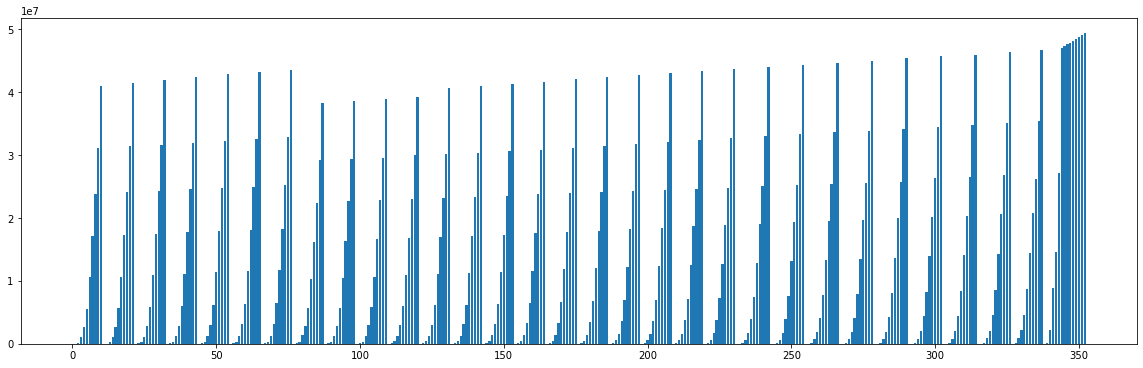

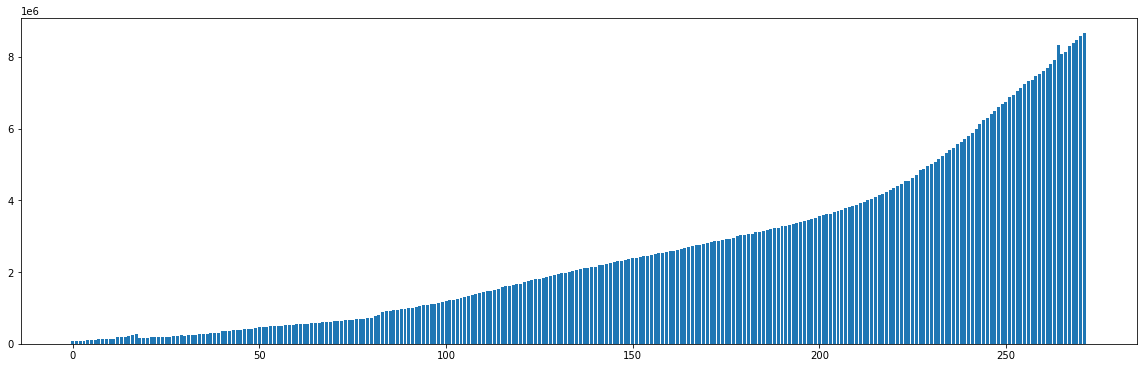

In [10]:
plt.figure(1)
plt.bar(np.arange(len(data)), totalrecovered_by_day)

plt.figure(2)
plt.bar(np.arange(len(data_us)), totalrecovered_by_day_us)

totalrecovered_by_day[-1],  totalrecovered_by_day_us[-1]

In [11]:
data[81].loc[data[81]['Country_Region']=='US']

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-09 03:33:03,34.223334,-82.461707,58,0,0,58,"Abbeville, South Carolina, US",236.474090,0.000000
1,22001.0,Acadia,Louisiana,US,2020-06-09 03:33:03,30.295065,-92.414197,513,29,0,484,"Acadia, Louisiana, US",826.819244,5.653021
2,51001.0,Accomack,Virginia,US,2020-06-09 03:33:03,37.767072,-75.632346,983,13,0,970,"Accomack, Virginia, US",3041.836861,1.322482
3,16001.0,Ada,Idaho,US,2020-06-09 03:33:03,43.452658,-116.241552,844,22,0,822,"Ada, Idaho, US",175.253900,2.606635
4,19001.0,Adair,Iowa,US,2020-06-09 03:33:03,41.330756,-94.471059,9,0,0,9,"Adair, Iowa, US",125.838926,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,66.0,0,Guam,US,2020-06-09 03:33:03,13.444300,144.793700,179,5,0,174,"Guam, US",108.994148,2.793296
3319,69.0,0,Northern Mariana Islands,US,2020-06-09 03:33:03,15.097900,145.673900,28,2,0,26,"Northern Mariana Islands, US",50.776150,7.142857
3360,72.0,0,Puerto Rico,US,2020-06-09 03:33:03,18.220800,-66.590100,5046,142,0,4904,"Puerto Rico, US",172.018349,2.814110
3370,0.0,0,Recovered,US,2020-06-09 03:33:03,0.000000,0.000000,0,0,0,-522145,"Recovered, US",0.000000,0.000000


old (without USA)  49396101
updated (with USA)  58058690.0


(272, 353, 81, 272, 353, 81, 272, 272, 272)

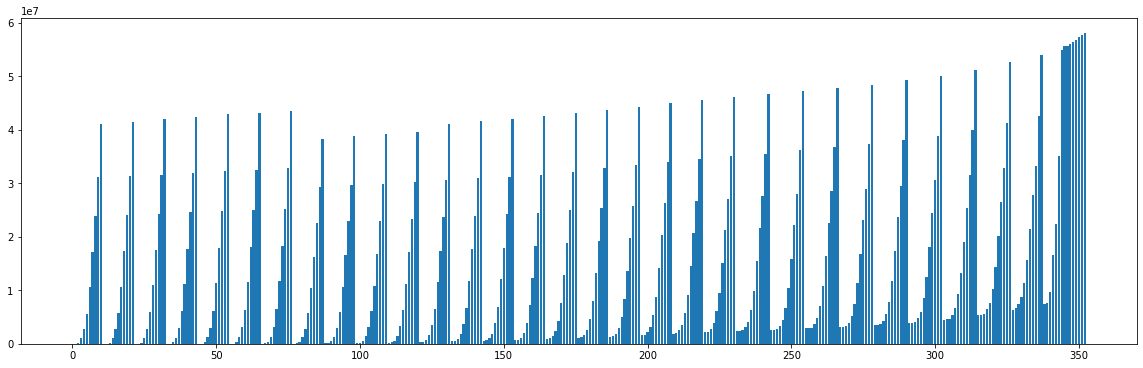

In [12]:
# Init a list of all zero values
update_part = [0 for i in range(len(totalrecovered_by_day_us))]

j = 0

# get Sum of total values without US and values with US
for i in np.arange(len(data)-len(data_us), len(data), 1):    
    update_part[j] = totalrecovered_by_day[i] + totalrecovered_by_day_us[j]
    # print(i, j, totalrecovered_by_day[i], totalrecovered_by_day_us[j], update_part[j])
    j = j+1

totalrecovered = totalrecovered_by_day[0:keep_values_day]  + update_part

plt.bar(np.arange(len(totalrecovered)), totalrecovered)
print("old (without USA) ", totalrecovered_by_day[-1]) 
print("updated (with USA) ", totalrecovered[-1]) 

len(update_part), len(totalrecovered), len(totalrecovered_by_day[0:keep_values_day]), len(totalrecovered_by_day_us), len(data), keep_values_day, len(data_us), len(totalrecovered_by_day_us), len(data)-keep_values_day

In [13]:
# # create dict for date (key as index, value as date)
data_date = dict([(i, files[i]) for i in range(len(files))]) 
# data_date

In [14]:
print("Total days passed: ", len(data))

Total days passed:  353


In [15]:
# Error with data on day 208, 207
day = 208
previous_day = 207
key = 'Deaths'
errors = data[day][key]-data[previous_day][key]

print("FILE TO CHECK: PREVIOUS_DAY {} and DAY {} ".format(data_date[previous_day], data_date[day]))
# print()
# print([(num_idx, diff) for num_idx, diff in enumerate(errors) if diff<0])

FILE TO CHECK: PREVIOUS_DAY 11-19-2020.csv and DAY 12-19-2020.csv 


In [16]:
# data[previous_day].iloc[3942], data[day].iloc[3942] # Example
# sum(data[day][key])-sum(data[previous_day][key])
data[day].iloc[0]

FIPS                                     0
Admin2                                   0
Province_State                           0
Country_Region                 Afghanistan
Last_Update            2020-12-20 05:27:32
Lat                                33.9391
Long_                                67.71
Confirmed                            49681
Deaths                                2047
Recovered                            38613
Active                                9021
Combined_Key                   Afghanistan
Incident_Rate                      127.622
Case_Fatality_Ratio                4.12029
Name: 0, dtype: object

In [17]:
# for i in range(len(data[previous_day])):
#     if (data[day].iloc[i].Country_Region == data[previous_day].iloc[i].Country_Region and data[day].iloc[i].Deaths < data[previous_day].iloc[i].Deaths):
#         print(i, data[previous_day].iloc[i].Country_Region, data[previous_day].iloc[i].Deaths, data[day].iloc[i].Deaths)

In [18]:
data[previous_day].iloc[3936], data[day].iloc[3936]

(FIPS                                         0
 Admin2                                       0
 Province_State                  Luhansk Oblast
 Country_Region                         Ukraine
 Last_Update                2020-11-20 05:26:28
 Lat                                     48.574
 Long_                                  39.3078
 Confirmed                                 5385
 Deaths                                     133
 Recovered                                 2922
 Active                                    2330
 Combined_Key           Luhansk Oblast, Ukraine
 Incident_Rate                          250.252
 Case_Fatality_Ratio                    2.46982
 Name: 3936, dtype: object,
 FIPS                                            0
 Admin2                                          0
 Province_State                  Kirovohrad Oblast
 Country_Region                            Ukraine
 Last_Update                   2020-12-20 05:27:32
 Lat                                       48

In [19]:
day = 282
previous_day = 281
key = 'Recovered'
errors = data[day][key]-data[previous_day][key]

print("FILE TO CHECK: PREVIOUS_DAY {} and DAY {} ".format(data_date[previous_day], data_date[day]))
print()
print([(num_idx, diff) for num_idx, diff in enumerate(errors) if diff<0])

FILE TO CHECK: PREVIOUS_DAY 03-26-2020.csv and DAY 04-26-2020.csv 

[]


In [20]:
data[previous_day].iloc[162], data[day].iloc[162]  # Example to check iloc at index 401

(FIPS                                30001
 Admin2                         Beaverhead
 Province_State                    Montana
 Country_Region                         US
 Last_Update           2020-03-26 23:48:35
 Lat                               45.1343
 Long_                            -112.898
 Confirmed                               0
 Deaths                                  0
 Recovered                               0
 Active                                  0
 Combined_Key      Beaverhead, Montana, US
 Name: 162, dtype: object,
 FIPS                            18007
 Admin2                         Benton
 Province_State                Indiana
 Country_Region                     US
 Last_Update       2020-04-27 02:30:52
 Lat                           40.6063
 Long_                        -87.3109
 Confirmed                           6
 Deaths                              0
 Recovered                           0
 Active                              6
 Combined_Key      Benton, I

In [21]:
# data_date.keys()
# for day in data_date.keys():    
#     for idx in range(len(data[day])-1):
        # print(day, idx)
#         if (data[day].loc[idx, 'Confirmed'] < 0):
#             print(day, data_date[day], 'Confirmed', idx, data[day].iloc[idx].Confirmed, data[day].iloc[idx].Country_Region)
# data[0][data[0] <0] = 0
# df = pd.DataFrame({'a': [0, -1, 2], 'b': [-3, 2, 1]})
# df

In [22]:
# df.where(df>=0, 0)  # keep all values >0, and replace all negative values with 0

In [23]:
# df.mask(df<0,0)  # replace all negative values with 0

In [24]:
# list(data_date.keys())
# list(data_date.keys())[:-1]
# data[336]
data_date.pop(0)

'02-01-2020.csv'

In [25]:
new_list = np.arange(0, len(list(data_date.keys())[:-1]),1)
new_list

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [26]:
for day in new_list:
    data[day].fillna(0)
    data[day][['Confirmed','Deaths','Recovered']] = data[day][['Confirmed','Deaths','Recovered']].mask(data[day][['Confirmed','Deaths','Recovered']]<0, 0)
    # data[day][['Confirmed','Deaths','Recovered']].where(data[day][['Confirmed','Deaths','Recovered']]>=0, 0)

In [27]:
# data[0][['Confirmed','Deaths','Recovered']].where(data[0][['Confirmed','Deaths','Recovered']]>=0, 0)

In [28]:
 #data[0][['Confirmed','Deaths','Recovered']]

In [29]:
# for day in data_date.keys():    
#     for idx in range(len(data[day])-1):
#         # print(day, idx)
#         if (data[day].loc[idx, 'Confirmed'] < 0):
#             print(day, data_date[day], 'Confirmed', idx, data[day].iloc[idx].Confirmed, data[day].iloc[idx].Country_Region)
            
#         if (data[day].iloc[idx].Deaths < 0):
#             print(day, data_date[day], 'Deaths', idx, data[day].iloc[idx].Deaths, data[day].iloc[idx].Country_Region)
            
#         if (data[day].iloc[idx].Recovered < 0):
#             print(day, data_date[day], 'Recovered', idx, data[day].iloc[idx].Recovered, data[day].iloc[idx].Country_Region)

In [30]:
# data[285].loc[data[285]['Country_Region'] == 'Colombia']

In [31]:
# Error: since 22.03.2020 use Country_Region, before that use Country/Region